# Boston House Prices Dataset - An Investigation

## Introduction

The Boston Housing Data consists of information collected by the US Census Service on housing in the Boston, Massachusetts area in 1970 and contains [506 entries with 13 distinct categories](https://www.kaggle.com/c/boston-housing) of numerical data. After doing some [background reading](https://towardsdatascience.com/linear-regression-on-boston-housing-dataset-f409b7e4a155as) about the data set I discovered that it is included in [SciKit Learn](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_boston.html), the Python machine learning library, and can therefore be easily imported into this notebook to anaylse. 

In [1]:
#Importing dataset
from sklearn.datasets import load_boston ##https://towardsdatascience.com/linear-regression-on-boston-housing-dataset-f409b7e4a155
boston = load_boston()

#import the other libraries and packages required to analyse the dataset
#for plotting graphs
import matplotlib.pyplot as plt
#for working with numerical arrays
import numpy as np
#for data visualisation
import seaborn as sns
#for statistical functions
import scipy.stats as ss
#for handling data
import pandas as pd
#"magic" code for displaying matplotlib generated plots in jupyter
%matplotlib inline
#for creating neural networks 
import keras as kr
#for splitting datasets
import sklearn.model_selection as mod
# For preprocessing data
import sklearn.preprocessing as pre

Using TensorFlow backend.


To take a first look at the data set we can use the below commands to ascertain the categories it holds and the characteristics of the data. 

In [2]:
print (boston.keys()) #https://towardsdatascience.com/linear-regression-on-boston-housing-dataset-f409b7e4a155

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])


In [3]:
print (boston.DESCR) #https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_boston.html

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

From the above detail it is made clear that there is a 14th "target" variable named **MEDV**, which is the "median value of owner-occupied homes in $1,000's".  The information listed above also verifies that there is no missing data in any of the attribute fields, which means that the data doesn't need to cleaned before any exploratory analysis can be performed, but to be certain, loading the data to a Pandas dataframe and using the **isnull()** function will confirm that - 

In [4]:
#load Boston dataset into Pandas dataframe https://towardsdatascience.com/linear-regression-on-boston-housing-dataset-f409b7e4a155
df = pd.DataFrame(boston.data, columns=boston.feature_names)
#http://www.neural.cz/dataset-exploration-boston-house-pricing.html
pd.isnull(df).any()

CRIM       False
ZN         False
INDUS      False
CHAS       False
NOX        False
RM         False
AGE        False
DIS        False
RAD        False
TAX        False
PTRATIO    False
B          False
LSTAT      False
dtype: bool

## Descriptive analysis
Descriptive statistics give a simple summary of a data set, and include such observations as the count, [standard deviation, minimum, maximum and mean](https://en.wikipedia.org/wiki/Descriptive_statistics) for example. This type of statistics doesn't make any assumptions about the data, rather it is a method by which to synopsise and describe it.  One way of finding out these sorts of observations about the Boston dataset is by using the Pandas [describe function](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.describe.html). With this function it is possible to summarise all columns and calculate some of these statistics - 

In [5]:
#summarise dataset
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


All of the so-called [13 "feature" attributes](https://www.kaggle.com/shreayan98c/boston-house-price-prediction) have been automatically included in the above dataframe. In order to understand the MEDV variable it is necessary to generate it as the "target" value add it as a new column to the dataframe. 

In [6]:
#code borrowed from https://towardsdatascience.com/feature-selection-with-pandas-e3690ad8504b
df["MEDV"] = boston.target #defines the MEDV column of the dataframe
X = df.drop("MEDV",1)   #Feature Matrix
y = df["MEDV"]          #Target Variable
df.head()#show first 5 rows of dataframe 

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In order to better understand the data and any notable relationships it holds, I decided to utilise [Pandas in-built correlation coefficients](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.corr.html) function to ascertain what statistical relationships exist between the variables - 

In [7]:
df.corr()#calculates correlation coefficients

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


To make this correlation matrix more accessible I thought it would be useful to plot it using Seaborn's heatmap to graphically represent these relationships, as recommended by [Abhini Shetye in her towardsdatascience.com blogpost - ](https://towardsdatascience.com/feature-selection-with-pandas-e3690ad8504b)

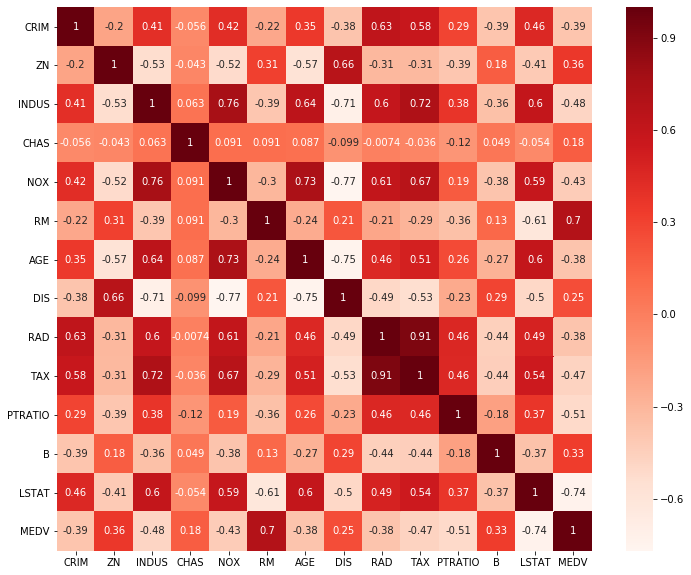

In [8]:
#https://towardsdatascience.com/feature-selection-with-pandas-e3690ad8504b
plt.figure(figsize=(12,10))#sets size of graph
cor = df.corr() #defines variable called cor that consists of correlation coefficients of dataframe
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)#calls Seaborn to graph a heatmap
plt.show()#calls Pyplot to show heatmap

The strongest correlations with the target variable according to the above graph are with "LSTAT" and "RM".  To better describe the relationship between these attributes I decided to generate a [pairplot](https://seaborn.pydata.org/generated/seaborn.pairplot.html) to visualise how they interact with each other. 

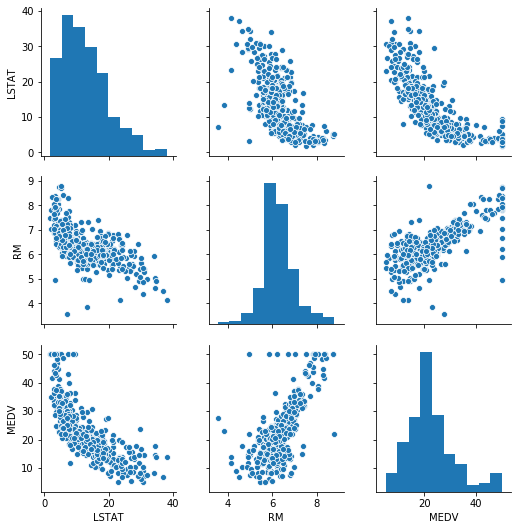

In [9]:
sns.pairplot(df, vars=["LSTAT", "RM",  "MEDV"])

We can tell from this pairplot that there is a positive linear relationship between the average number of rooms per property (RM) and the target variable.  We can also see that the target variable - MEDV - is normally distributed with some outliers, as per the histogram in the bottom left of the above graph.

It is possible to also use the [describe function](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.mstats.describe.html?highlight=descriptive) from scipy.stats to outline some descriptive statistics of the Boston data.  This function computes the size of the data (nobs), the min and max, the kurtosis([measure that describes the distribution](https://www.investopedia.com/terms/k/kurtosis.asp), the skewness([where the curve in a distribution appears distorted or skews to the left or right](https://whatis.techtarget.com/definition/skewness)), the mean and the variance([measures how far each number in the set is from the mean and therefore from every other number in the set](https://www.investopedia.com/terms/v/variance.asp) of each variable in the data set and returns this information in an array - 

In [10]:
from scipy.stats.mstats import describe #imports scipy stats package
describe(df)#returns descriptive statistics of dataframe

C:\Users\Aideen and Ken\Anaconda\lib\site-packages\scipy\stats\mstats_basic.py:2300: MaskedArrayFutureWarning: In the future the default for ma.minimum.reduce will be axis=0, not the current None, to match np.minimum.reduce. Explicitly pass 0 or None to silence this warning.
  mm = (ma.minimum.reduce(a), ma.maximum.reduce(a))
C:\Users\Aideen and Ken\Anaconda\lib\site-packages\scipy\stats\mstats_basic.py:2300: MaskedArrayFutureWarning: In the future the default for ma.maximum.reduce will be axis=0, not the current None, to match np.maximum.reduce. Explicitly pass 0 or None to silence this warning.
  mm = (ma.minimum.reduce(a), ma.maximum.reduce(a))


DescribeResult(nobs=array([506, 506, 506, 506, 506, 506, 506, 506, 506, 506, 506, 506, 506,
       506], dtype=int64), minmax=(masked_array(data=0.,
             mask=False,
       fill_value=1e+20), masked_array(data=711.,
             mask=False,
       fill_value=1e+20)), mean=masked_array(data=[3.61352356e+00, 1.13636364e+01, 1.11367787e+01,
                   6.91699605e-02, 5.54695059e-01, 6.28463439e+00,
                   6.85749012e+01, 3.79504269e+00, 9.54940711e+00,
                   4.08237154e+02, 1.84555336e+01, 3.56674032e+02,
                   1.26530632e+01, 2.25328063e+01],
             mask=False,
       fill_value=1e+20), variance=masked_array(data=[7.38403597e+01, 5.42861840e+02, 4.69714297e+01,
                   6.43854770e-02, 1.34010989e-02, 4.92695216e-01,
                   7.90792473e+02, 4.42525226e+00, 7.56665313e+01,
                   2.83486236e+04, 4.67772630e+00, 8.31828042e+03,
                   5.08939794e+01, 8.44195562e+01],
             mask=F

## Inferential Statistics
Inferential statistics differ from descriptive statistics in that rather than summarise the data, they are used to prove, or infer, certain theories about it - for example, [testing a hyopthesis and using a sample of a population to infer a characteristic of that population](https://www.mymarketresearchmethods.com/descriptive-inferential-statistics-difference/). Examples of this kind of statistics are t-tests, regression and ANOVA, all of which I will attempt to explore as part of this project. 

By selecting the 2 relevant columns for the purposes of completing this part of the assignment - CHAS (whether houses are situated along the Charles River or not) and MEDV (the median house prices) - and adding them to their own Pandas dataframe it is possible to begin interpreting any statistical relationship between these variables.  As proximity of houses to the river is denoted in the CHAS column with a "1" and conversely, "0" for those not along the river, I needed to find a method of sorting the data to demonstrate this, and also, the relationship that houses with an entry of "1" have with the median house value.  I found [this blog post](https://towardsdatascience.com/5-minute-guide-to-plotting-with-pandas-e8c0f40a1df4) that details how to create a pivot table with Pandas to calculate the mean value for each category and subsequently plot the results with a bar plot - 

In [11]:
columns = ["CHAS", "MEDV"]#declare a variable called columns containing the 2 relevant variables
df1 = pd.DataFrame(df, columns=columns)#create a new dataframe of just these 2 columns 
#below code borrowed from https://towardsdatascience.com/5-minute-guide-to-plotting-with-pandas-e8c0f40a1df4
pivot = pd.pivot_table(df1, values='MEDV', index=['CHAS'])#define pivot table values and index 
pivot #display pivot table

,MEDV
CHAS,
0.0,22.093843
1.0,28.440000


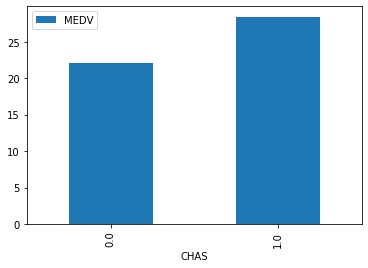

In [12]:
pivot.plot(kind='bar')#plot bar chart of pivot

We can see from the above bar chart that houses that are situated along the river have a higher price than those that are not. I wanted to further demonstrate the relationship between properties on the river and their price by isolating the values where site was denoted with a "1" in the CHAS column, and chose to do this using the [.loc function](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.loc.html) in Pandas to create a dataframe called "onriver", and then, using the [count function in Pandas](https://pandas.pydata.org/pandas-docs/version/0.23/generated/pandas.DataFrame.count.html) to ascertain how many houses in the dataset belong in this group and to provide confirmation of the opposite category in order to ensure accuracy. 

In [13]:
onriver = df1.loc[df['CHAS'] == 1]#create dataframe named onriver where entries in CHAS variable are 1
onriver.count()#perform count operation on the onriver dataframe

CHAS    35
MEDV    35
dtype: int64

In [14]:
notonriver = df1.loc[df['CHAS'] == 0]#create dataframe named notonriver where entries in CHAS variable are 0
notonriver.count()#perform count operation on the notonriver dataframe

CHAS    471
MEDV    471
dtype: int64

From these counts we can see that there are 35 houses in the dataset that bound the river and 471 that do not, totalling 506 properties as per the full dataset. 
To better understand if there are significant differences between the value of properties on the river or those that are not I wanted to plot the 2 distinct categories for median house price with each other -  

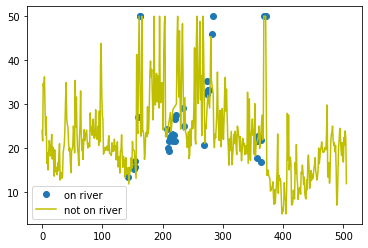

In [97]:
r = onriver['CHAS'] #isolating if houses are on river
t = onriver['MEDV'] #corresponding value for price on river
p = notonriver['CHAS'] #isolating if houses are not on river
q = notonriver['MEDV'] #corresponding value for price not on river
plt.plot(t,'o', label='on river')
plt.plot(q, 'y', label='not on river')
plt.legend()
plt.show()

The above graph suggests that in some cases there is a significant difference in median prices for houses on the river, but that the majority of the data points denoting this condition are positioned in the middle of the graph, which suggests that proximity to the Charles river is not a clear indication of house value. 

### Linear Regression
Using the [linregress function from scipy.stats](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.linregress.html?highlight=linear%20regression) it is possible to calcuate the linear least squares regression for the 2 variables, and in turn, plot the findings.

slope: 6.346157  intercept: 22.093843  r_value: 0.175260  p_value: 0.000074  std_err: 1.587954


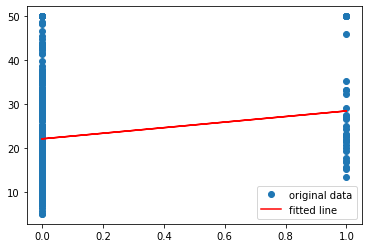

In [15]:
x = df['CHAS']#independent variable
y = df['MEDV']#dependent variable
# Get slope, intercept from linregress() to plot y' = intercept + slope*x
slope, intercept, r_value, p_value, std_err = ss.linregress(x, y)
print("slope: %f  intercept: %f  r_value: %f  p_value: %f  std_err: %f" % (slope, intercept, r_value, p_value, std_err))
#plot the data with fitted line
plt.plot(x, y,'o', label='original data')
plt.plot(x, intercept + slope*x, 'r', label='fitted line')
plt.legend()
plt.show()

As the above graph shows, the median value rises for properties that bound the river, as the slope of the line represents the increasing MEDV attribute along the x axis, therefore proving the increase in price.  I

### Independent T-test
As CHAS is a [dichotomous variable](https://statistics.laerd.com/statistical-guides/types-of-variable.php) it may be the case that an [independent t-test](https://statistics.laerd.com/spss-tutorials/independent-t-test-using-spss-statistics.php) could be a good interpretation of any statistical significance between these variables.  This test is used to test [for a significant difference between the mean of two independent (unrelated) groups](https://pythonfordatascience.org/independent-t-test-python/) and proposes the null hypothesis that the mean of sample 1 is equal to the mean of sample 2. This can be tested using the [independent t-test function available in scipy.stats](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html), which will return both the calculated t-statistic and the two-tailed p-value. Testing the CHAS and MEDV variables in this way gives the following result - 

In [87]:
r = onriver['CHAS'] #labelling CHAS variable as x
t = onriver['MEDV'] #labelling MEDV variable as y
#using Scipy.stats' independent t-test function on x and y
ss.ttest_ind(r, t)

Ttest_indResult(statistic=-13.7380155395527, pvalue=2.7015872471386418e-21)

In [95]:
p = notonriver['CHAS']
q = notonriver['MEDV']
ss.ttest_ind(p,q)

Ttest_indResult(statistic=-54.294271186009965, pvalue=4.796256602271557e-292)

This result can allow us to reject the null hypothesis as stated above. Following on from this, I wondered what would be the outcome of performing the same test on values from the variable that denotes if houses are on the river or not on the river - 

In [17]:
o = onriver['MEDV']#selects values from MEDV Variable that are on river
n = notonriver['MEDV']#selects values from MEDV variable that are not on river
ss.ttest_ind(o,n)

Ttest_indResult(statistic=3.996437466090509, pvalue=7.390623170519905e-05)

Again, as the result of the pvalue is relatively high we can reject the null hypothesis on this basis also. 

### ANOVA
ANOVA means "analysis of variance" and ["can be thought of as an extension to the t-test"](https://pythonfordatascience.org/anova-python/), in that it is used to extend the functions of the t-test beyond 2 groups,by comparing the means of all groups to determine ["whether any of those means are statistically significantly different from each other"](https://statistics.laerd.com/statistical-guides/one-way-anova-statistical-guide.php) I decided to apply this test using the [f_oneway function in scipy.stats](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.f_oneway.html) with the variables representing the entire MEDV column together with the s

In [73]:
ss.f_oneway(onriver, notonriver)

F_onewayResult(statistic=array([1.12836294e+15, 1.59715124e+01]), pvalue=array([0.00000000e+00, 7.39062317e-05]))

# Predicting 

In Machine Learning,[neural networks](https://en.wikipedia.org/wiki/Neural_network) are sets of computer algorithms that are designed to replicate the functions of biological circuits of neurons in a simplified way. Their purpose is to recognise patterns and they can be trained with numerical datsets to interpret, learn and subsequently make predictions based on these patterns. Neural networks can be used for among other things, image processing and recognition, data validation, financial forecasting and industrial diagnostic systems.
Keras incorporates Theano and TensorFlow through its backend, both mathematical machine learning platforms, and allows for less complex user engagement through its high level frontend API. For this assignment, I will use the [Keras](https://keras.io/) deep learning library for Python (imported as kr) to build layers of neurons with the [Sequential model](https://keras.io/getting-started/sequential-model-guide/).  

In [19]:
#https://machinelearningmastery.com/regression-tutorial-keras-deep-learning-library-python/
#https://keras.io/

# Split the dataset into input variables (x) and output variable (y)
x = df.iloc[:, 0:13] #selects first 13 columns of dataset
y = df['MEDV'] #selects target variable

x_train, x_test, y_train, y_test = mod.train_test_split(x, y, test_size=0.3)
# Create a new neural network.
m = kr.models.Sequential()
m.add(kr.layers.Dense(13, input_dim=13, activation='relu'))
m.add(kr.layers.Dense(1, activation='linear'))
m.compile(loss="mean_squared_error", optimizer="adam")

# Train the model.
m.fit(x_train, y_train, epochs=100, batch_size=5)

# Run each x value through the neural network.
p = m.predict(x_test)

Epoch 1/100
354/354 [==============================] - 1s 2ms/step - loss: 34130.7603
Epoch 2/100
354/354 [==============================] - 0s 411us/step - loss: 5213.1853
Epoch 3/100
354/354 [==============================] - 0s 341us/step - loss: 566.3056
Epoch 4/100
354/354 [==============================] - 0s 355us/step - loss: 249.0568
Epoch 5/100
354/354 [==============================] - 0s 406us/step - loss: 226.9842
Epoch 6/100
354/354 [==============================] - 0s 366us/step - loss: 207.5682
Epoch 7/100
354/354 [==============================] - 0s 411us/step - loss: 190.1092
Epoch 8/100
354/354 [==============================] - 0s 394us/step - loss: 175.0815
Epoch 9/100
354/354 [==============================] - 0s 414us/step - loss: 161.4017
Epoch 10/100
354/354 [==============================] - 0s 411us/step - loss: 150.5306
Epoch 11/100
354/354 [==============================] - 0s 431us/step - loss: 140.8677
Epoch 12/100
354/354 [=============================

354/354 [==============================] - 0s 380us/step - loss: 45.2883
Epoch 96/100
354/354 [==============================] - 0s 358us/step - loss: 45.2275
Epoch 97/100
354/354 [==============================] - 0s 352us/step - loss: 44.8621
Epoch 98/100
354/354 [==============================] - 0s 420us/step - loss: 45.3517
Epoch 99/100
354/354 [==============================] - 0s 307us/step - loss: 46.4689
Epoch 100/100
354/354 [==============================] - 0s 352us/step - loss: 43.9757


In [20]:
m.evaluate(x_test, y_test)

152/152 [==============================] - 0s 492us/step


51.33757159584447

In [21]:
scaler = pre.StandardScaler()
scaler.fit(x_test)
x_test_scaled = scaler.transform(x_test)

m.fit(x_test_scaled, y_test, epochs=100, batch_size=5)

Epoch 1/100
152/152 [==============================] - 0s 426us/step - loss: 550.8121
Epoch 2/100
152/152 [==============================] - 0s 354us/step - loss: 505.9769
Epoch 3/100
152/152 [==============================] - 0s 381us/step - loss: 457.2187
Epoch 4/100
152/152 [==============================] - 0s 348us/step - loss: 404.7416
Epoch 5/100
152/152 [==============================] - 0s 361us/step - loss: 353.4511
Epoch 6/100
152/152 [==============================] - 0s 341us/step - loss: 303.3918
Epoch 7/100
152/152 [==============================] - 0s 341us/step - loss: 258.6613
Epoch 8/100
152/152 [==============================] - 0s 413us/step - loss: 219.5003
Epoch 9/100
152/152 [==============================] - 0s 387us/step - loss: 185.6910
Epoch 10/100
152/152 [==============================] - 0s 361us/step - loss: 158.1952
Epoch 11/100
152/152 [==============================] - 0s 361us/step - loss: 134.5175
Epoch 12/100
152/152 [==============================

152/152 [==============================] - 0s 328us/step - loss: 15.6570
Epoch 97/100
152/152 [==============================] - 0s 328us/step - loss: 15.5056
Epoch 98/100
152/152 [==============================] - 0s 361us/step - loss: 15.3984
Epoch 99/100
152/152 [==============================] - 0s 348us/step - loss: 15.3180
Epoch 100/100
152/152 [==============================] - 0s 289us/step - loss: 15.1215


In [22]:
m.evaluate(x_test_scaled, y_test)

152/152 [==============================] - 0s 59us/step


14.97311060052169

## References
1. https://www.kaggle.com/c/boston-housing
2. https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_boston.html
3. https://towardsdatascience.com/linear-regression-on-boston-housing-dataset-f409b7e4a155
4. http://www.neural.cz/dataset-exploration-boston-house-pricing.html
5. https://en.wikipedia.org/wiki/Descriptive_statistics 
6. https://www.kaggle.com/shreayan98c/boston-house-price-prediction
7. https://towardsdatascience.com/feature-selection-with-pandas-e3690ad8504b
8. https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.corr.html
9. https://seaborn.pydata.org/generated/seaborn.pairplot.html
10. https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.mstats.describe.html?highlight=descriptive
11. https://www.investopedia.com/terms/k/kurtosis.asp
12. https://whatis.techtarget.com/definition/skewness
13. https://www.investopedia.com/terms/v/variance.asp
14. https://www.mymarketresearchmethods.com/descriptive-inferential-statistics-difference/
15. https://towardsdatascience.com/5-minute-guide-to-plotting-with-pandas-e8c0f40a1df4
16. https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.loc.html
17. https://pandas.pydata.org/pandas-docs/version/0.23/generated/pandas.DataFrame.count.html
18. https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.linregress.html?highlight=linear%20regression
19. https://statistics.laerd.com/statistical-guides/types-of-variable.php
20. https://statistics.laerd.com/spss-tutorials/independent-t-test-using-spss-statistics.php
21. https://pythonfordatascience.org/independent-t-test-python/
15. https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html
16. https://pythonfordatascience.org/anova-python/
17. https://en.wikipedia.org/wiki/Neural_network
18. https://keras.io/
19. https://keras.io/getting-started/sequential-model-guide/